<a href="https://colab.research.google.com/github/Evandro72/Mineracao-Facebook/blob/Mining-FB-FanPage/Minera%C3%A7%C3%A3o_e_An%C3%A1lise_de_Dados_do_Facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mineração e Análise de Dados do Facebook

## Importação das bibliotecas

In [13]:
!pip install facebook-sdk
#!pip install facebook-sdk 3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import facebook
import requests
import pandas as pd
import numpy as np

In [15]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import plotly.express as px

## Obtenção de token temporário

In [17]:
app_id = '1305357566668553'
app_secret = '107460222ef72e3491a2cab338420e55'
# 1 hora
user_short_token = 'EAASjNz4Q7wkBALon02iHwsPf7eU9sb5BQ0ZCZB5LFdS2hZAdH35qhxHs4wouKAJXoc9zskejV0qfG6H7zf8eJZBZCbaXmCXiBMrenM1wwG3fYbUfL6gMZBXYrOIrGy5enIqIGMt6irpIOJQRdEvLpfRMID6u6i3zrfzS8Aj0togPGTDgNXppYsZAeFkvOGyalZA3EYIy4jXVetGZCd7BKeQ4hRjvvZCAQ55vCZARd7yVuXhLQ7Xnm8pHRhM'

In [18]:
url = 'https://graph.facebook.com/oauth/access_token'

In [19]:
parameters = {'grant_type': 'fb_exchange_token',
              'client_id': app_id,
              'client_secret': app_secret,
              'fb_exchange_token': user_short_token}

In [20]:
response = requests.get(url, params=parameters)

In [21]:
response

<Response [200]>

In [22]:
response_json = response.json()
response_json

{'access_token': 'EAASjNz4Q7wkBAGRYIlTozXO1cq0CbyrVOzkbxRFCCnchcrMZCJezpg7leY3LV7ycEgG7Q1HvtWORLIIpEfZBzb7XncZBmib3MYjscpJVpCaU6wUVUogrQpZAxBPl5qZBsBuZBCCFg10U3XuP07NqpJ8vl4ZBpA4dxkKoZAFwjPKGnLwOKfwlQJfn',
 'token_type': 'bearer'}

In [23]:
# 2 meses
user_long_token = response_json['access_token']
user_long_token

'EAASjNz4Q7wkBAGRYIlTozXO1cq0CbyrVOzkbxRFCCnchcrMZCJezpg7leY3LV7ycEgG7Q1HvtWORLIIpEfZBzb7XncZBmib3MYjscpJVpCaU6wUVUogrQpZAxBPl5qZBsBuZBCCFg10U3XuP07NqpJ8vl4ZBpA4dxkKoZAFwjPKGnLwOKfwlQJfn'

## Obtenção de token permanente

In [24]:
graph = facebook.GraphAPI(access_token=user_long_token, version='3.1')

In [25]:
dados_pagina = graph.get_object('/me/accounts')
dados_pagina

{'data': [{'access_token': 'EAASjNz4Q7wkBAOR6N2Tmp0SDe3tLr3sel5fnZBZB3mjeQQPcCiOYYVhSWgFdxluIsDZCYCaUPc0AZCUcZBHZCA4zXbVnNdVTBIReoYnWqabvlAyayZC0hAc6yTCziZBlynDFq0CZAn3LmLQB3MB8qLius0yw7YRoz6tG0HFwVkawz7QZCqomFnc4Ih',
   'category': 'Musician',
   'category_list': [{'id': '1335670856447673', 'name': 'Musician'},
    {'id': '1201', 'name': 'Song'}],
   'name': 'Van Botti',
   'id': '100822251451665',
   'tasks': ['ADVERTISE',
    'ANALYZE',
    'CREATE_CONTENT',
    'MESSAGING',
    'MODERATE',
    'MANAGE']},
  {'access_token': 'EAASjNz4Q7wkBAARsYN6ppSMEZC1VlkNMEPZAWwodSr7zRZB2owzrGwObu04B9XCy76UiZCM8iJlIuBniHs5aWTk4xqZCy6YS5uYvw9JgZBCVo7awBC7Xp3D9nBC0XX0IBz1kkZC3zGhOYLUIe1TxYZAdLPZCvcDtlT4h22I9SjyEbu3W4qcyD89Ob',
   'category': 'Community',
   'category_list': [{'id': '2612', 'name': 'Community'}],
   'name': 'Atelie Divino Bordado',
   'id': '146494689150490',
   'tasks': ['ANALYZE',
    'ADVERTISE',
    'MESSAGING',
    'MODERATE',
    'CREATE_CONTENT',
    'MANAGE']},
  {'access_to

In [26]:
permanent_page_token = dados_pagina['data'][4]['access_token']
permanent_page_token

'EAASjNz4Q7wkBAOPUruulZAZC4gV4P0YxvZAOyfFlZCJFNgof2vvRY7RMTjuip2xectorafw5EZBVMXAfy9SfNydszqtpxOwUNZC5AhfztKUq38qaxUntjJTsNDPlxzJjaWV1hawZCTeaZBxoQsF0AyTlHkHZAsJkjH5OaD315xsbhdJbhTiZBK20kd'

In [27]:
page_id = dados_pagina['data'][4]['id']
page_id

'460789837367424'

In [28]:
# permanent_page_token = 'EAASjNz4Q7wkBAH3OFif8EkK8hPCCNy1s33ZB9FevLmoEZCf1nXZCoIgbTDHViINDpgm2zohfPyk47ErsrYj5GSgeNhD7zfp35b6DAxIJ9U0BbuTqHZBI1bZAYZCfLEJTwjklUEuV3U4ubPDRWw2i7AgZAQAZB9Rei0QGY3Q5OwX80wX6i4JjAa2x'
# page_id = '460789837367424'

## Informações básicas da página

- Documentação: https://developers.facebook.com/docs/graph-api/reference/v10.0/insights

In [29]:
graph = facebook.GraphAPI(access_token=permanent_page_token, version = '3.1')

In [30]:
graph.get_object(id=page_id, fields='category')

{'category': 'Artist', 'id': '460789837367424'}

In [31]:
graph.get_object(id=page_id, fields='name')

{'name': 'Vandextv', 'id': '460789837367424'}

In [32]:
graph.get_object(id=page_id)

{'name': 'Vandextv', 'id': '460789837367424'}

In [33]:
graph.get_object(id=page_id, fields='about, website')

{'about': 'VandexTv é a primeira WebTV baiana de música independente. Criada em 2009 por Vandex, fundador da ',
 'website': 'http://www.vandex.tv/',
 'id': '460789837367424'}

In [34]:
graph.get_object(id=page_id, fields='fan_count')

{'fan_count': 1129, 'id': '460789837367424'}

In [35]:
graph.get_object(id=page_id, fields='birthday')

{'birthday': '02/16/1986', 'id': '460789837367424'}

In [36]:
graph.get_object(id=page_id, fields='engagement')

{'id': '460789837367424'}

In [37]:
graph.get_object(id=page_id, fields='followers_count')

{'followers_count': 1129, 'id': '460789837367424'}

## Informações sobre os fãs da página

### Fãs por data

In [38]:
graph.get_connections(id = page_id, connection_name='insights', metric='page_fans')

{'data': [{'name': 'page_fans',
   'period': 'day',
   'values': [{'value': 1108, 'end_time': '2022-09-02T07:00:00+0000'},
    {'value': 1108, 'end_time': '2022-09-03T07:00:00+0000'}],
   'title': 'Lifetime Total Likes',
   'description': 'Lifetime: The total number of people who have liked your Page. (Unique Users)',
   'id': '460789837367424/insights/page_fans/day'}],
 'paging': {'previous': 'https://graph.facebook.com/v14.0/460789837367424/insights?access_token=EAASjNz4Q7wkBAOPUruulZAZC4gV4P0YxvZAOyfFlZCJFNgof2vvRY7RMTjuip2xectorafw5EZBVMXAfy9SfNydszqtpxOwUNZC5AhfztKUq38qaxUntjJTsNDPlxzJjaWV1hawZCTeaZBxoQsF0AyTlHkHZAsJkjH5OaD315xsbhdJbhTiZBK20kd&metric=page_fans&since=1661842800&until=1662015600',
  'next': 'https://graph.facebook.com/v14.0/460789837367424/insights?access_token=EAASjNz4Q7wkBAOPUruulZAZC4gV4P0YxvZAOyfFlZCJFNgof2vvRY7RMTjuip2xectorafw5EZBVMXAfy9SfNydszqtpxOwUNZC5AhfztKUq38qaxUntjJTsNDPlxzJjaWV1hawZCTeaZBxoQsF0AyTlHkHZAsJkjH5OaD315xsbhdJbhTiZBK20kd&metric=page_fans&sin

In [39]:
fas = graph.get_connections(id=page_id, connection_name='insights', metric='page_fans',
                            since = '2022-05-31', until = '2022-08-30')

In [40]:
type(fas), type(fas['data'])

(dict, list)

In [41]:
type(fas['data'][0]['values'])

list

In [42]:
fas

{'data': [{'name': 'page_fans',
   'period': 'day',
   'values': [{'value': 1099, 'end_time': '2022-06-01T07:00:00+0000'},
    {'value': 1099, 'end_time': '2022-06-02T07:00:00+0000'},
    {'value': 1099, 'end_time': '2022-06-03T07:00:00+0000'},
    {'value': 1100, 'end_time': '2022-06-04T07:00:00+0000'},
    {'value': 1100, 'end_time': '2022-06-05T07:00:00+0000'},
    {'value': 1100, 'end_time': '2022-06-06T07:00:00+0000'},
    {'value': 1100, 'end_time': '2022-06-07T07:00:00+0000'},
    {'value': 1100, 'end_time': '2022-06-08T07:00:00+0000'},
    {'value': 1100, 'end_time': '2022-06-09T07:00:00+0000'},
    {'value': 1100, 'end_time': '2022-06-10T07:00:00+0000'},
    {'value': 1100, 'end_time': '2022-06-11T07:00:00+0000'},
    {'value': 1100, 'end_time': '2022-06-12T07:00:00+0000'},
    {'value': 1100, 'end_time': '2022-06-13T07:00:00+0000'},
    {'value': 1100, 'end_time': '2022-06-14T07:00:00+0000'},
    {'value': 1100, 'end_time': '2022-06-15T07:00:00+0000'},
    {'value': 1100, 'en

In [43]:
dataframe_facebook = pd.DataFrame(fas['data'][0]['values'])
dataframe_facebook.rename(columns={'value': 'numero fas', 'end_time': 'data'}, inplace=True)
dataframe_facebook['data'] = pd.to_datetime(dataframe_facebook['data'])
dataframe_facebook['data'] = dataframe_facebook['data'].dt.strftime('%Y-%m-%d')
dataframe_facebook

,numero fas,data
0,1099,2022-06-01
1,1099,2022-06-02
2,1099,2022-06-03
3,1100,2022-06-04
4,1100,2022-06-05
...,...,...
85,1105,2022-08-25
86,1107,2022-08-26
87,1107,2022-08-27
88,1107,2022-08-28


In [44]:
grafico = px.line(dataframe_facebook, x = 'data', y = 'numero fas', title = 'Número de fãs por dia')
grafico.show()

### Fãs por idioma

In [45]:
fas_idioma = graph.get_connections(id=page_id, connection_name='insights', metric = 'page_fans_locale',
                                   since = '2022-05-31', until = '2022-08-30')
fas_idioma

{'data': [{'name': 'page_fans_locale',
   'period': 'day',
   'values': [{'value': {'it_IT': 3,
      'es_LA': 4,
      'fr_CA': 1,
      'ar_AR': 1,
      'en_GB': 5,
      'en_US': 37,
      'tr_TR': 128,
      'id_ID': 3,
      'pt_BR': 876,
      'fr_FR': 3,
      'de_DE': 2,
      'pt_PT': 36},
     'end_time': '2022-06-01T07:00:00+0000'},
    {'value': {'it_IT': 3,
      'es_LA': 4,
      'ar_AR': 1,
      'fr_CA': 1,
      'en_GB': 5,
      'en_US': 37,
      'tr_TR': 128,
      'id_ID': 3,
      'pt_BR': 876,
      'fr_FR': 3,
      'de_DE': 2,
      'pt_PT': 36},
     'end_time': '2022-06-02T07:00:00+0000'},
    {'value': {'it_IT': 3,
      'es_LA': 4,
      'ar_AR': 1,
      'fr_CA': 1,
      'en_GB': 5,
      'en_US': 37,
      'tr_TR': 128,
      'id_ID': 3,
      'pt_BR': 876,
      'fr_FR': 3,
      'de_DE': 2,
      'pt_PT': 36},
     'end_time': '2022-06-03T07:00:00+0000'},
    {'value': {'it_IT': 3,
      'es_LA': 4,
      'fr_CA': 1,
      'ar_AR': 1,
      'en_GB': 5

In [46]:
fas_idioma['data'][0]['values'][0]['value']

{'it_IT': 3,
 'es_LA': 4,
 'fr_CA': 1,
 'ar_AR': 1,
 'en_GB': 5,
 'en_US': 37,
 'tr_TR': 128,
 'id_ID': 3,
 'pt_BR': 876,
 'fr_FR': 3,
 'de_DE': 2,
 'pt_PT': 36}

In [47]:
fas_idioma_df = pd.DataFrame.from_dict(fas_idioma['data'][0]['values'][0]['value'], orient='index')
fas_idioma_df.reset_index(inplace=True)
fas_idioma_df.rename(columns={'index': 'idioma', 0: 'quantidade'}, inplace=True)
fas_idioma_df

,idioma,quantidade
0,it_IT,3
1,es_LA,4
2,fr_CA,1
3,ar_AR,1
4,en_GB,5
5,en_US,37
6,tr_TR,128
7,id_ID,3
8,pt_BR,876
9,fr_FR,3


In [48]:
grafico = px.bar(fas_idioma_df, x='idioma', y='quantidade', title='Fãs por idioma')
grafico.show()

### Fãs por cidade

In [49]:
fas_cidade = graph.get_connections(id=page_id, connection_name='insights', metric='page_fans_city',
                                   since = '2022-05-31', until = '2022-08-30')
fas_cidade

{'data': [{'name': 'page_fans_city',
   'period': 'day',
   'values': [{'value': {'Curitiba, PR, Brazil': 2,
      'Cruz Alta, RS, Brazil': 2,
      'Canavieiras, BA, Brazil': 2,
      'Nigde, Niğde Province, Turkey': 2,
      'Yüksekova, Hakkâri Province, Turkey': 2,
      'Kahramanmaras, Kahramanmaraş Province, Turkey': 2,
      'Presidente Dutra, BA, Brazil': 2,
      'Buenos Aires, Ciudad Autónoma de Buenos Aires, Argentina': 2,
      'Campina Grande, PB, Brazil': 2,
      'Porto Seguro, BA, Brazil': 2,
      'Santo Antônio de Jesus, BA, Brazil': 2,
      'São Sebastião do Passé, BA, Brazil': 2,
      'Arembepe, BA, Brazil': 3,
      'Campo Formoso, BA, Brazil': 3,
      'Bursa, Bursa Province, Turkey': 3,
      'Ilhéus, BA, Brazil': 3,
      'Konya, Konya Province, Turkey': 3,
      'Santa Luz, BA, Brazil': 3,
      'Teixeira de Freitas, BA, Brazil': 3,
      'Jacobina, BA, Brazil': 3,
      'Recife, PE, Brazil': 3,
      'Esplanada, BA, Brazil': 3,
      'Macaé, RJ, Brazil': 3,
 

In [50]:
fas_cidade['data'][0]['values'][0]['value']

{'Curitiba, PR, Brazil': 2,
 'Cruz Alta, RS, Brazil': 2,
 'Canavieiras, BA, Brazil': 2,
 'Nigde, Niğde Province, Turkey': 2,
 'Yüksekova, Hakkâri Province, Turkey': 2,
 'Kahramanmaras, Kahramanmaraş Province, Turkey': 2,
 'Presidente Dutra, BA, Brazil': 2,
 'Buenos Aires, Ciudad Autónoma de Buenos Aires, Argentina': 2,
 'Campina Grande, PB, Brazil': 2,
 'Porto Seguro, BA, Brazil': 2,
 'Santo Antônio de Jesus, BA, Brazil': 2,
 'São Sebastião do Passé, BA, Brazil': 2,
 'Arembepe, BA, Brazil': 3,
 'Campo Formoso, BA, Brazil': 3,
 'Bursa, Bursa Province, Turkey': 3,
 'Ilhéus, BA, Brazil': 3,
 'Konya, Konya Province, Turkey': 3,
 'Santa Luz, BA, Brazil': 3,
 'Teixeira de Freitas, BA, Brazil': 3,
 'Jacobina, BA, Brazil': 3,
 'Recife, PE, Brazil': 3,
 'Esplanada, BA, Brazil': 3,
 'Macaé, RJ, Brazil': 3,
 'Serrinha, BA, Brazil': 4,
 'Aracaju, SE, Brazil': 4,
 'Petrolina, PE, Brazil': 5,
 'Gaziantep, Gaziantep Province, Turkey': 5,
 'Jequié, BA, Brazil': 6,
 'Itabuna, BA, Brazil': 7,
 'Simões F

In [51]:
fas_cidade_df = pd.DataFrame.from_dict(fas_cidade['data'][0]['values'][0]['value'], orient='index')
fas_cidade_df.reset_index(inplace=True)
fas_cidade_df.rename(columns={'index': 'cidade', 0: 'quantidade'}, inplace=True)
fas_cidade_df

,cidade,quantidade
0,"Curitiba, PR, Brazil",2
1,"Cruz Alta, RS, Brazil",2
2,"Canavieiras, BA, Brazil",2
3,"Nigde, Niğde Province, Turkey",2
4,"Yüksekova, Hakkâri Province, Turkey",2
5,"Kahramanmaras, Kahramanmaraş Province, Turkey",2
6,"Presidente Dutra, BA, Brazil",2
7,"Buenos Aires, Ciudad Autónoma de Buenos Aires,...",2
8,"Campina Grande, PB, Brazil",2
9,"Porto Seguro, BA, Brazil",2


In [52]:
grafico = px.bar(fas_cidade_df, x = 'cidade', y='quantidade', title = 'Fãs por cidade')
grafico.show()

In [53]:
grafico = px.treemap(fas_cidade_df, path = ['cidade', 'quantidade'])
grafico

### Fãs por país

In [54]:
fas_pais = graph.get_connections(id=page_id, connection_name='insights', metric='page_fans_country',
                                 since = '2022-05-31', until = '2022-08-30')
fas_pais

{'data': [{'name': 'page_fans_country',
   'period': 'day',
   'values': [{'value': {'DE': 6,
      'PT': 5,
      'JP': 1,
      'CN': 2,
      'IT': 3,
      'FR': 1,
      'CO': 1,
      'AO': 1,
      'BR': 926,
      'AR': 4,
      'AU': 1,
      'PE': 1,
      'CY': 1,
      'VN': 1,
      'PH': 4,
      'NG': 1,
      'GB': 3,
      'ID': 3,
      'PL': 1,
      'CA': 1,
      'US': 7,
      'TR': 125},
     'end_time': '2022-06-01T07:00:00+0000'},
    {'value': {'DE': 6,
      'PT': 5,
      'JP': 1,
      'CN': 2,
      'IT': 3,
      'FR': 1,
      'CO': 1,
      'AO': 1,
      'BR': 926,
      'AR': 4,
      'AU': 1,
      'PE': 1,
      'CY': 1,
      'VN': 1,
      'PH': 4,
      'NG': 1,
      'GB': 3,
      'ID': 3,
      'PL': 1,
      'CA': 1,
      'US': 7,
      'TR': 125},
     'end_time': '2022-06-02T07:00:00+0000'},
    {'value': {'DE': 6,
      'PT': 5,
      'JP': 1,
      'CN': 2,
      'IT': 3,
      'CO': 1,
      'FR': 1,
      'AO': 1,
      'BR': 926,
    

In [55]:
fas_pais['data'][0]['values'][0]['value']

{'DE': 6,
 'PT': 5,
 'JP': 1,
 'CN': 2,
 'IT': 3,
 'FR': 1,
 'CO': 1,
 'AO': 1,
 'BR': 926,
 'AR': 4,
 'AU': 1,
 'PE': 1,
 'CY': 1,
 'VN': 1,
 'PH': 4,
 'NG': 1,
 'GB': 3,
 'ID': 3,
 'PL': 1,
 'CA': 1,
 'US': 7,
 'TR': 125}

In [56]:
fas_pais_df = pd.DataFrame.from_dict(fas_pais['data'][0]['values'][0]['value'], orient='index')
fas_pais_df.reset_index(inplace=True)
fas_pais_df.rename(columns={"index": "pais", 0: "quantidade"}, inplace=True)
fas_pais_df

,pais,quantidade
0,DE,6
1,PT,5
2,JP,1
3,CN,2
4,IT,3
5,FR,1
6,CO,1
7,AO,1
8,BR,926
9,AR,4


In [57]:
grafico = px.bar(fas_pais_df, x="pais", y="quantidade", title = 'Fãs por país')
grafico.show()

In [58]:
grafico = px.treemap(fas_pais_df, path=['pais', 'quantidade'])
grafico

### Fãs por idade e gênero

In [59]:
fas_idade_genero = graph.get_connections(id=page_id, connection_name='insights', metric='page_fans_gender_age',
                                         since = '2022-05-31', until = '2022-08-30')
fas_idade_genero

{'data': [{'name': 'page_fans_gender_age',
   'period': 'day',
   'values': [{'value': {'M.55-64': 59,
      'U.35-44': 5,
      'F.45-54': 71,
      'M.18-24': 60,
      'M.35-44': 237,
      'F.25-34': 78,
      'M.25-34': 215,
      'U.45-54': 1,
      'F.13-17': 2,
      'F.65+': 12,
      'F.55-64': 24,
      'M.65+': 25,
      'F.35-44': 69,
      'M.45-54': 199,
      'F.18-24': 42},
     'end_time': '2022-06-01T07:00:00+0000'},
    {'value': {'M.55-64': 59,
      'U.35-44': 5,
      'F.45-54': 71,
      'M.18-24': 60,
      'M.35-44': 237,
      'F.25-34': 78,
      'M.25-34': 215,
      'U.45-54': 1,
      'F.13-17': 2,
      'F.65+': 12,
      'F.55-64': 24,
      'M.65+': 25,
      'F.35-44': 69,
      'M.45-54': 199,
      'F.18-24': 42},
     'end_time': '2022-06-02T07:00:00+0000'},
    {'value': {'M.55-64': 59,
      'U.35-44': 5,
      'F.45-54': 71,
      'M.18-24': 60,
      'M.35-44': 237,
      'F.25-34': 79,
      'M.25-34': 215,
      'U.45-54': 1,
      'F.13-17':

In [60]:
fas_idade_genero['data'][0]['values'][0]['value']

{'M.55-64': 59,
 'U.35-44': 5,
 'F.45-54': 71,
 'M.18-24': 60,
 'M.35-44': 237,
 'F.25-34': 78,
 'M.25-34': 215,
 'U.45-54': 1,
 'F.13-17': 2,
 'F.65+': 12,
 'F.55-64': 24,
 'M.65+': 25,
 'F.35-44': 69,
 'M.45-54': 199,
 'F.18-24': 42}

In [61]:
fas_idade_genero_df = pd.DataFrame.from_dict(fas_idade_genero['data'][0]['values'][0]['value'], orient='index')
fas_idade_genero_df.reset_index(inplace=True)
fas_idade_genero_df.rename(columns={"index": "idade genero", 0: "quantidade"}, inplace=True)
fas_idade_genero_df

,idade genero,quantidade
0,M.55-64,59
1,U.35-44,5
2,F.45-54,71
3,M.18-24,60
4,M.35-44,237
5,F.25-34,78
6,M.25-34,215
7,U.45-54,1
8,F.13-17,2
9,F.65+,12


In [62]:
grafico = px.bar(fas_idade_genero_df, x="idade genero", y="quantidade", title = 'Fãs por idade e gênero')
grafico.show()

### Curtidas e descurtidas da página

In [63]:
curtidas = graph.get_connections(id=page_id, connection_name='insights', metric='page_fan_adds',
                                 since = '2022-05-31', until = '2022-08-30')
curtidas

{'data': [{'name': 'page_fan_adds',
   'period': 'day',
   'values': [{'value': 0, 'end_time': '2022-06-01T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-02T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-03T07:00:00+0000'},
    {'value': 1, 'end_time': '2022-06-04T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-05T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-06T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-07T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-08T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-09T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-10T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-11T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-12T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-13T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-14T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-15T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-16T07:00:00+0000'},
    {'

In [64]:
numero_curtidas = []
for i in curtidas['data'][0]['values']:
  #print(i['value'])
  numero_curtidas.append(i['value'])
numero_curtidas = np.array(numero_curtidas)

In [65]:
numero_curtidas

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [66]:
descurtidas = graph.get_connections(id=page_id, connection_name='insights', metric='page_fan_removes',
                                    since = '2022-05-31', until = '2022-08-30')
descurtidas

{'data': [{'name': 'page_fan_removes',
   'period': 'day',
   'values': [{'value': 1, 'end_time': '2022-06-01T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-02T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-03T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-04T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-05T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-06T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-07T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-08T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-09T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-10T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-11T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-12T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-13T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-14T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-15T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-16T07:00:00+0000'},
   

In [67]:
numero_descurtidas = []
for i in descurtidas['data'][0]['values']:
  numero_descurtidas.append(i['value'])
numero_descurtidas = np.array(numero_descurtidas)

In [68]:
numero_descurtidas

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [69]:
len(dataframe_facebook), len(numero_curtidas), len(numero_descurtidas)

(90, 90, 90)

In [70]:
dataframe_facebook['numero curtidas'] = numero_curtidas
dataframe_facebook['numero descurtidas'] = numero_descurtidas
dataframe_facebook

,numero fas,data,numero curtidas,numero descurtidas
0,1099,2022-06-01,0,1
1,1099,2022-06-02,0,0
2,1099,2022-06-03,0,0
3,1100,2022-06-04,1,0
4,1100,2022-06-05,0,0
...,...,...,...,...
85,1105,2022-08-25,0,0
86,1107,2022-08-26,0,0
87,1107,2022-08-27,0,0
88,1107,2022-08-28,0,0


In [71]:
dataframe_facebook.describe()

,numero fas,numero curtidas,numero descurtidas
count,90.000000,90.000000,90.000000
mean,1103.266667,0.022222,0.055556
std,2.565107,0.148231,0.230345
min,1099.000000,0.000000,0.000000
25%,1100.000000,0.000000,0.000000
50%,1104.000000,0.000000,0.000000
75%,1105.000000,0.000000,0.000000
max,1107.000000,1.000000,1.000000


In [72]:
dataframe_facebook[dataframe_facebook['numero curtidas'] == 11]

,numero fas,data,numero curtidas,numero descurtidas


In [73]:
dataframe_facebook[dataframe_facebook['numero descurtidas'] == 4]

,numero fas,data,numero curtidas,numero descurtidas


In [74]:
grafico = px.line(title = 'Curtidas x descurtidas')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['numero curtidas'], name = 'Curtidas')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['numero descurtidas'], name = 'Descurtidas')
grafico.show()

In [75]:
dataframe_facebook['numero curtidas'].sum(), dataframe_facebook['numero descurtidas'].sum()

(2, 5)

In [76]:
136 + 74, (74 / 210) * 100

(210, 35.23809523809524)

In [77]:
descurtidas_tipo = graph.get_connections(id=page_id, connection_name='insights', metric='page_fans_by_unlike_source_unique',
                                         since = '2022-05-31', until = '2022-08-30')
descurtidas_tipo

{'data': [{'name': 'page_fans_by_unlike_source_unique',
   'period': 'day',
   'values': [{'value': {'Other': 1}, 'end_time': '2022-06-01T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-02T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-03T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-04T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-05T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-06T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-07T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-08T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-09T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-10T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-11T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-12T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-13T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-14T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-15T07:00:00+0000'},
    {'value': {}, '

In [78]:
motivos = {}
for i in descurtidas_tipo['data'][0]['values']:
  #print(i)
  if i['value']:
    #print(i)
    #print('---------')
    #print(i['value'])
    for k, v in i['value'].items():
      #print(k,v)
      if k in motivos:
        motivos[k] += v
      else:
        motivos[k] = v

In [79]:
motivos

{'Other': 2, 'Deactivated or Memorialized Account Removals': 3}

In [80]:
motivos_df = pd.DataFrame.from_dict(motivos, orient='index')
motivos_df.reset_index(inplace=True)
motivos_df.rename(columns={'index': 'motivo', 0: 'quantidade'}, inplace=True)
motivos_df

,motivo,quantidade
0,Other,2
1,Deactivated or Memorialized Account Removals,3


In [81]:
grafico = px.bar(motivos_df, x = 'motivo', y = 'quantidade', title = 'Motivos das descurtidas na página')
grafico.show()

In [82]:
136 + 74, (19 / 210) * 100

(210, 9.047619047619047)

## Visualizações, cliques, engajamento e impressões



### Visualizações de abas

In [83]:
visualizacao_abas = graph.get_connections(id=page_id, connection_name='insights', metric = 'page_tab_views_login_top_unique',
                                          since = '2022-05-31', until = '2022-08-30')
visualizacao_abas

{'data': [{'name': 'page_tab_views_login_top_unique',
   'period': 'day',
   'values': [{'value': {'tab_home': 1},
     'end_time': '2022-06-01T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-02T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-03T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-04T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-05T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-06T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-07T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-08T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-09T07:00:00+0000'},
    {'value': {'tab_home': 1}, 'end_time': '2022-06-10T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-11T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-12T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-13T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-14T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-15T07:00:00+0000'},


In [84]:
fonte_visualizacao = {}
for i in visualizacao_abas['data'][0]['values']:
  #print(i)
  if i['value']:
    for k, v in i['value'].items():
      #print(k,v)
      if k in fonte_visualizacao:
        fonte_visualizacao[k] += v
      else:
        fonte_visualizacao[k] = v

In [85]:
fonte_visualizacao

{'tab_home': 20, 'tab_videos': 2, 'tab_photos': 2, 'home': 1}

In [86]:
fonte_visualizacao_df = pd.DataFrame.from_dict(fonte_visualizacao, orient='index')
fonte_visualizacao_df.reset_index(inplace=True)
fonte_visualizacao_df.rename(columns={"index": "fonte", 0: "quantidade"}, inplace=True)
fonte_visualizacao_df

,fonte,quantidade
0,tab_home,20
1,tab_videos,2
2,tab_photos,2
3,home,1


In [87]:
grafico = px.bar(fonte_visualizacao_df, x='fonte', y="quantidade", title = 'Visualização por abas')
grafico.show()

### Cliques nas informações de contato e chamada para ação

In [88]:
cliques_contato_acao = graph.get_connections(id=page_id, connection_name='insights', metric = 'page_total_actions',
                                             since = '2022-05-31', until = '2022-08-30')
cliques_contato_acao

{'data': [{'name': 'page_total_actions',
   'period': 'day',
   'values': [{'value': 0, 'end_time': '2022-06-01T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-02T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-03T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-04T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-05T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-06T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-07T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-08T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-09T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-10T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-11T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-12T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-13T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-14T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-15T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-16T07:00:00+0000'},
 

In [89]:
numero_cliques_contato_acao = []
for i in cliques_contato_acao['data'][0]['values']:
  #print(i)
  numero_cliques_contato_acao.append(i['value'])
numero_cliques_contato_acao = np.array(numero_cliques_contato_acao)

In [90]:
numero_cliques_contato_acao

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [91]:
len(numero_cliques_contato_acao)

90

In [92]:
dataframe_facebook['numero cliques contato acao'] = numero_cliques_contato_acao
dataframe_facebook

,numero fas,data,numero curtidas,numero descurtidas,numero cliques contato acao
0,1099,2022-06-01,0,1,0
1,1099,2022-06-02,0,0,0
2,1099,2022-06-03,0,0,0
3,1100,2022-06-04,1,0,0
4,1100,2022-06-05,0,0,0
...,...,...,...,...,...
85,1105,2022-08-25,0,0,0
86,1107,2022-08-26,0,0,0
87,1107,2022-08-27,0,0,0
88,1107,2022-08-28,0,0,0


In [93]:
1 / 0.14

7.142857142857142

In [94]:
dataframe_facebook['numero cliques contato acao'].describe()

count    90.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: numero cliques contato acao, dtype: float64

In [95]:
grafico = px.line(dataframe_facebook, x="data", y="numero cliques contato acao", title = 'Número de cliques em contato e link para ação')
grafico.show()

### Cliques em como chegar

In [96]:
graph.get_connections(id=page_id, connection_name='insights', metric='page_get_directions_clicks_logged_in_unique')

{'data': [{'name': 'page_get_directions_clicks_logged_in_unique',
   'period': 'day',
   'values': [{'value': 0, 'end_time': '2022-09-02T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-09-03T07:00:00+0000'}],
   'title': 'Daily Total get direction click count per Page',
   'description': 'Daily: Total get direction click count per Page  (Unique Users)',
   'id': '460789837367424/insights/page_get_directions_clicks_logged_in_unique/day'},
  {'name': 'page_get_directions_clicks_logged_in_unique',
   'period': 'week',
   'values': [{'value': 0, 'end_time': '2022-09-02T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-09-03T07:00:00+0000'}],
   'title': 'Weekly Total get direction click count per Page',
   'description': 'Weekly: Total get direction click count per Page (Unique Users)',
   'id': '460789837367424/insights/page_get_directions_clicks_logged_in_unique/week'},
  {'name': 'page_get_directions_clicks_logged_in_unique',
   'period': 'days_28',
   'values': [{'value': 0, 'end

### Engajamento na página - número de cliques

In [97]:
engajamento = graph.get_connections(id=page_id, connection_name='insights', metric='page_engaged_users',
                                    since = '2022-05-31', until = '2022-08-30')
engajamento

{'data': [{'name': 'page_engaged_users',
   'period': 'day',
   'values': [{'value': 0, 'end_time': '2022-06-01T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-02T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-03T07:00:00+0000'},
    {'value': 1, 'end_time': '2022-06-04T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-05T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-06T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-07T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-08T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-09T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-10T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-11T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-12T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-13T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-14T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-15T07:00:00+0000'},
    {'value': 4, 'end_time': '2022-06-16T07:00:00+0000'},
 

In [98]:
engajamento_cliques = []
for i in engajamento['data'][0]['values']:
  engajamento_cliques.append(i['value'])
engajamento_cliques = np.array(engajamento_cliques)

In [99]:
engajamento_cliques

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, 0, 1, 3,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [100]:
len(engajamento_cliques)

90

In [101]:
dataframe_facebook['numero cliques engajamento'] = engajamento_cliques
dataframe_facebook

,numero fas,data,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento
0,1099,2022-06-01,0,1,0,0
1,1099,2022-06-02,0,0,0,0
2,1099,2022-06-03,0,0,0,0
3,1100,2022-06-04,1,0,0,1
4,1100,2022-06-05,0,0,0,0
...,...,...,...,...,...,...
85,1105,2022-08-25,0,0,0,0
86,1107,2022-08-26,0,0,0,0
87,1107,2022-08-27,0,0,0,0
88,1107,2022-08-28,0,0,0,0


In [102]:
grafico = px.line(dataframe_facebook, x="data", y="numero cliques engajamento", title = 'Engajamento - número de cliques')
grafico.show()

### Engajamento por tipo

In [103]:
engajamento_tipo = graph.get_connections(id=page_id, connection_name='insights', metric='page_consumptions_by_consumption_type',
                                         since = '2022-05-31', until = '2022-08-31')
engajamento_tipo

{'data': [{'name': 'page_consumptions_by_consumption_type',
   'period': 'day',
   'values': [{'value': {}, 'end_time': '2022-06-01T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-02T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-03T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-04T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-05T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-06T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-07T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-08T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-09T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-10T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-11T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-12T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-13T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-14T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-15T07:00:00+0000'},
    {'value': {'link clic

In [104]:
fonte_engajamento = {}
for i in engajamento_tipo['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in fonte_engajamento:
        fonte_engajamento[k] += v
      else:
        fonte_engajamento[k] = v

In [105]:
fonte_engajamento

{'link clicks': 1, 'other clicks': 10, 'video play': 11}

In [106]:
fonte_engajamento_df = pd.DataFrame.from_dict(fonte_engajamento, orient='index')
fonte_engajamento_df.reset_index(inplace=True)
fonte_engajamento_df.rename(columns={"index": "fonte", 0: "quantidade"}, inplace=True)
fonte_engajamento_df

,fonte,quantidade
0,link clicks,1
1,other clicks,10
2,video play,11


In [107]:
grafico = px.bar(fonte_engajamento_df, x='fonte', y="quantidade", title = 'Fonte do engajamento')
grafico.show()

### Número de check-ins na página

In [108]:
graph.get_connections(id=page_id, connection_name='insights', metric='page_places_checkin_total')

{'data': [{'name': 'page_places_checkin_total',
   'period': 'day',
   'values': [{'value': 0, 'end_time': '2022-09-02T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-09-03T07:00:00+0000'}],
   'title': 'Daily Total Check-Ins',
   'description': 'Daily: Total check-ins at your Place (Total Count)',
   'id': '460789837367424/insights/page_places_checkin_total/day'},
  {'name': 'page_places_checkin_total',
   'period': 'week',
   'values': [{'value': 0, 'end_time': '2022-09-02T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-09-03T07:00:00+0000'}],
   'title': 'Weekly Total Check-Ins',
   'description': 'Weekly: Total check-ins at your Place (Total Count)',
   'id': '460789837367424/insights/page_places_checkin_total/week'},
  {'name': 'page_places_checkin_total',
   'period': 'days_28',
   'values': [{'value': 0, 'end_time': '2022-09-02T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-09-03T07:00:00+0000'}],
   'title': '28 Days Total Check-Ins',
   'description': '28 Days: To

### Ações positivas por tipo

In [109]:
acoes_positivas = graph.get_connections(id=page_id, connection_name='insights', metric='page_positive_feedback_by_type',
                                        since = '2022-05-31', until = '2022-08-31')
acoes_positivas

{'data': [{'name': 'page_positive_feedback_by_type',
   'period': 'day',
   'values': [{'value': {}, 'end_time': '2022-06-01T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-02T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-03T07:00:00+0000'},
    {'value': {'other': 1}, 'end_time': '2022-06-04T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-05T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-06T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-07T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-08T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-09T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-10T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-11T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-12T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-13T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-14T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-15T07:00:00+0000'},
    {'value': {}, 'end

In [110]:
fonte_positivas = {}
for i in acoes_positivas['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in fonte_positivas:
        fonte_positivas[k] += v
      else:
        fonte_positivas[k] = v

In [111]:
fonte_positivas

{'other': 3, 'like': 2}

In [112]:
fonte_positivas_df = pd.DataFrame.from_dict(fonte_positivas, orient='index')
fonte_positivas_df.reset_index(inplace=True)
fonte_positivas_df.rename(columns={"index": "fonte", 0: "quantidade"}, inplace=True)
fonte_positivas_df

,fonte,quantidade
0,other,3
1,like,2


In [113]:
grafico = px.bar(fonte_positivas_df, x='fonte', y="quantidade", title = 'Fonte de ações positivas')
grafico.show()

### Ações negativas por tipo

In [114]:
acoes_negativas = graph.get_connections(id=page_id, connection_name='insights', metric='page_negative_feedback_by_type',
                                        since = '2022-05-31', until = '2022-08-30')
acoes_negativas

{'data': [{'name': 'page_negative_feedback_by_type',
   'period': 'day',
   'values': [{'value': {}, 'end_time': '2022-06-01T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-02T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-03T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-04T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-05T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-06T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-07T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-08T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-09T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-10T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-11T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-12T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-13T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-14T07:00:00+0000'},
    {'value': {}, 'end_time': '2022-06-15T07:00:00+0000'},
    {'value': {}, 'end_time': '2

In [115]:
fonte_negativas = {}
for i in acoes_negativas['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in fonte_negativas:
        fonte_negativas[k] += v
      else:
        fonte_negativas[k] = v

In [116]:
fonte_negativas

{}

### Visualizações pela hora do dia

In [117]:
hora_dia = graph.get_connections(id=page_id, connection_name='insights', metric='page_fans_online',
                                 since = '2022-05-31', until = '2022-08-31')
hora_dia

{'data': [{'name': 'page_fans_online',
   'period': 'day',
   'values': [{'value': {'0': 70,
      '1': 111,
      '2': 207,
      '3': 257,
      '4': 286,
      '5': 294,
      '6': 307,
      '7': 319,
      '8': 333,
      '9': 348,
      '10': 339,
      '11': 317,
      '12': 315,
      '13': 343,
      '14': 346,
      '15': 345,
      '16': 345,
      '17': 333,
      '18': 312,
      '19': 241,
      '20': 181,
      '21': 118,
      '22': 77,
      '23': 72},
     'end_time': '2022-06-01T07:00:00+0000'},
    {'value': {'0': 71,
      '1': 110,
      '2': 195,
      '3': 238,
      '4': 287,
      '5': 294,
      '6': 300,
      '7': 326,
      '8': 341,
      '9': 360,
      '10': 355,
      '11': 348,
      '12': 334,
      '13': 322,
      '14': 313,
      '15': 332,
      '16': 329,
      '17': 347,
      '18': 316,
      '19': 261,
      '20': 173,
      '21': 103,
      '22': 87,
      '23': 72},
     'end_time': '2022-06-02T07:00:00+0000'},
    {'value': {'0': 71,
     

In [118]:
visualizacao_hora = {}
for i in hora_dia['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in visualizacao_hora:
        visualizacao_hora[k] += v
      else:
        visualizacao_hora[k] = v

In [119]:
visualizacao_hora

{'0': 6652,
 '1': 9159,
 '2': 15830,
 '3': 21108,
 '4': 25131,
 '5': 27173,
 '6': 28273,
 '7': 29047,
 '8': 30221,
 '9': 30618,
 '10': 29376,
 '11': 28826,
 '12': 29147,
 '13': 30140,
 '14': 30958,
 '15': 30776,
 '16': 30175,
 '17': 29612,
 '18': 27363,
 '19': 22401,
 '20': 16208,
 '21': 11095,
 '22': 8041,
 '23': 7482}

In [120]:
hora_dia_df = pd.DataFrame.from_dict(visualizacao_hora, orient='index')
hora_dia_df.reset_index(inplace=True)
hora_dia_df.rename(columns={"index": "hora", 0: "quantidade"}, inplace=True)
hora_dia_df

,hora,quantidade
0,0,6652
1,1,9159
2,2,15830
3,3,21108
4,4,25131
5,5,27173
6,6,28273
7,7,29047
8,8,30221
9,9,30618


In [121]:
grafico = px.bar(hora_dia_df, x='hora', y="quantidade", title = 'Visualizações por hora do dia')
grafico.show()

### Curtidas pagas e não pagas

In [122]:
curtidas_pagas_nao_pagas = graph.get_connections(id=page_id, connection_name='insights',
                                                 metric='page_fan_adds_by_paid_non_paid_unique',
                                                 since = '2022-05-31', until = '2022-08-30')
curtidas_pagas_nao_pagas

{'data': [{'name': 'page_fan_adds_by_paid_non_paid_unique',
   'period': 'day',
   'values': [{'value': {'total': 0, 'paid': 0, 'unpaid': 0},
     'end_time': '2022-06-01T07:00:00+0000'},
    {'value': {'total': 0, 'paid': 0, 'unpaid': 0},
     'end_time': '2022-06-02T07:00:00+0000'},
    {'value': {'total': 0, 'paid': 0, 'unpaid': 0},
     'end_time': '2022-06-03T07:00:00+0000'},
    {'value': {'total': 1, 'paid': 0, 'unpaid': 1},
     'end_time': '2022-06-04T07:00:00+0000'},
    {'value': {'total': 0, 'paid': 0, 'unpaid': 0},
     'end_time': '2022-06-05T07:00:00+0000'},
    {'value': {'total': 0, 'paid': 0, 'unpaid': 0},
     'end_time': '2022-06-06T07:00:00+0000'},
    {'value': {'total': 0, 'paid': 0, 'unpaid': 0},
     'end_time': '2022-06-07T07:00:00+0000'},
    {'value': {'total': 0, 'paid': 0, 'unpaid': 0},
     'end_time': '2022-06-08T07:00:00+0000'},
    {'value': {'total': 0, 'paid': 0, 'unpaid': 0},
     'end_time': '2022-06-09T07:00:00+0000'},
    {'value': {'total': 0, '

In [123]:
curtidas_pagas = []
curtidas_nao_pagas = []
for i in curtidas_pagas_nao_pagas['data'][0]['values']:
  #print(i, i['value']['paid'], i['value']['unpaid'])
  curtidas_pagas.append(i['value']['paid'])
  curtidas_nao_pagas.append(i['value']['unpaid'])
curtidas_pagas = np.array(curtidas_pagas)
curtidas_nao_pagas = np.array(curtidas_nao_pagas)

In [124]:
curtidas_pagas

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [125]:
curtidas_nao_pagas

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [126]:
dataframe_facebook['curtidas pagas'] = curtidas_pagas
dataframe_facebook['curtidas nao pagas'] = curtidas_nao_pagas
dataframe_facebook

,numero fas,data,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas
0,1099,2022-06-01,0,1,0,0,0,0
1,1099,2022-06-02,0,0,0,0,0,0
2,1099,2022-06-03,0,0,0,0,0,0
3,1100,2022-06-04,1,0,0,1,0,1
4,1100,2022-06-05,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
85,1105,2022-08-25,0,0,0,0,0,0
86,1107,2022-08-26,0,0,0,0,0,0
87,1107,2022-08-27,0,0,0,0,0,0
88,1107,2022-08-28,0,0,0,0,0,0


In [127]:
grafico = px.line(title = 'Curtidas pagas x curtidas não pagas')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['curtidas pagas'], name = 'Curtidas pagas')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['curtidas nao pagas'], name = 'Curtidas não pagas')
grafico.show()

### Distribuição de conteúdo pago, orgânico e viral

In [128]:
distribuicao_paga = graph.get_connections(id=page_id, connection_name='insights', metric='page_impressions_paid',
                                          since = '2022-05-31', until = '2022-08-30')
distribuicao_paga

{'data': [{'name': 'page_impressions_paid',
   'period': 'day',
   'values': [{'value': 0, 'end_time': '2022-06-01T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-02T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-03T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-04T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-05T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-06T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-07T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-08T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-09T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-10T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-11T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-12T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-13T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-14T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-15T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-16T07:00:00+0000'}

In [129]:
numero_distribuicao_paga = []
for i in distribuicao_paga['data'][0]['values']:
  numero_distribuicao_paga.append(i['value'])
numero_distribuicao_paga = np.array(numero_distribuicao_paga)

In [130]:
numero_distribuicao_paga

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [131]:
distribuicao_organica = graph.get_connections(id=page_id, connection_name='insights', 
                                              metric='page_impressions_organic',
                                              since = '2022-05-31', until = '2022-08-30')
distribuicao_organica

{'data': [{'name': 'page_impressions_organic',
   'period': 'day',
   'values': [{'value': 0, 'end_time': '2022-06-01T07:00:00+0000'},
    {'value': 1, 'end_time': '2022-06-02T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-03T07:00:00+0000'},
    {'value': 1, 'end_time': '2022-06-04T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-05T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-06T07:00:00+0000'},
    {'value': 1, 'end_time': '2022-06-07T07:00:00+0000'},
    {'value': 1, 'end_time': '2022-06-08T07:00:00+0000'},
    {'value': 2, 'end_time': '2022-06-09T07:00:00+0000'},
    {'value': 1, 'end_time': '2022-06-10T07:00:00+0000'},
    {'value': 2, 'end_time': '2022-06-11T07:00:00+0000'},
    {'value': 2, 'end_time': '2022-06-12T07:00:00+0000'},
    {'value': 1, 'end_time': '2022-06-13T07:00:00+0000'},
    {'value': 1, 'end_time': '2022-06-14T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-15T07:00:00+0000'},
    {'value': 51, 'end_time': '2022-06-16T07:00:00+00

In [132]:
numero_distribuicao_organica = []
for i in distribuicao_organica['data'][0]['values']:
  numero_distribuicao_organica.append(i['value'])
numero_distribuicao_organica = np.array(numero_distribuicao_organica)

In [133]:
numero_distribuicao_organica

array([ 0,  1,  0,  1,  0,  0,  1,  1,  2,  1,  2,  2,  1,  1,  0, 51,  7,
       15,  4,  9, 42,  7,  1,  2,  1,  0,  1,  0,  2,  1,  2,  8,  1,  1,
        0,  2,  2,  3,  0,  0,  1,  4,  0,  2,  0,  1,  1,  1,  1,  0,  4,
        3,  0,  0,  0,  0,  1,  3,  1,  1,  1,  0,  1,  0,  0,  0,  0,  1,
        0,  1,  0,  0,  0,  2,  1,  0,  1,  0,  2,  1,  1, 40,  0,  1,  2,
        0,  3,  1,  6,  2])

In [134]:
distribuicao_viral = graph.get_connections(id=page_id, connection_name='insights', 
                                           metric='page_impressions_viral',
                                           since = '2022-05-31', until = '2022-08-30')
distribuicao_viral

{'data': [{'name': 'page_impressions_viral',
   'period': 'day',
   'values': [{'value': 0, 'end_time': '2022-06-01T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-02T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-03T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-04T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-05T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-06T07:00:00+0000'},
    {'value': 1, 'end_time': '2022-06-07T07:00:00+0000'},
    {'value': 1, 'end_time': '2022-06-08T07:00:00+0000'},
    {'value': 1, 'end_time': '2022-06-09T07:00:00+0000'},
    {'value': 1, 'end_time': '2022-06-10T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-11T07:00:00+0000'},
    {'value': 1, 'end_time': '2022-06-12T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-13T07:00:00+0000'},
    {'value': 1, 'end_time': '2022-06-14T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-06-15T07:00:00+0000'},
    {'value': 50, 'end_time': '2022-06-16T07:00:00+0000

In [135]:
numero_distribuicao_viral = []
for i in distribuicao_viral['data'][0]['values']:
  numero_distribuicao_viral.append(i['value'])
numero_distribuicao_viral = np.array(numero_distribuicao_viral)

In [136]:
numero_distribuicao_viral

array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,  1,  0,  1,  0, 50,  7,
       15,  2,  9, 41,  7,  1,  1,  0,  0,  0,  0,  0,  1,  2,  7,  1,  1,
        0,  2,  2,  3,  0,  0,  0,  4,  0,  2,  0,  1,  1,  1,  1,  0,  4,
        3,  0,  0,  0,  0,  1,  3,  1,  1,  1,  0,  1,  0,  0,  0,  0,  1,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  8,  0,  1,  2,
        0,  3,  1,  6,  2])

In [137]:
dataframe_facebook['numero distribuicao paga'] = numero_distribuicao_paga
dataframe_facebook['numero distribuicao organica'] = numero_distribuicao_organica
dataframe_facebook['numero distribuicao viral'] = numero_distribuicao_viral
dataframe_facebook

,numero fas,data,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
0,1099,2022-06-01,0,1,0,0,0,0,0,0,0
1,1099,2022-06-02,0,0,0,0,0,0,0,1,0
2,1099,2022-06-03,0,0,0,0,0,0,0,0,0
3,1100,2022-06-04,1,0,0,1,0,1,0,1,0
4,1100,2022-06-05,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
85,1105,2022-08-25,0,0,0,0,0,0,0,0,0
86,1107,2022-08-26,0,0,0,0,0,0,0,3,3
87,1107,2022-08-27,0,0,0,0,0,0,0,1,1
88,1107,2022-08-28,0,0,0,0,0,0,0,6,6


In [138]:
grafico = px.line(title = 'Distribuição paga x orgânica x viral')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['numero distribuicao paga'], name = 'Paga')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['numero distribuicao organica'], name = 'Orgânica')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['numero distribuicao viral'], name = 'Viral')
grafico.show()

In [139]:
grafico = px.line(title = 'Distribuição orgânica x viral')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['numero distribuicao organica'], name = 'Orgânica')
grafico.add_scatter(x = dataframe_facebook['data'], y = dataframe_facebook['numero distribuicao viral'], name = 'Viral')
grafico.show()

In [140]:
dataframe_facebook.columns

Index(['numero fas', 'data', 'numero curtidas', 'numero descurtidas',
       'numero cliques contato acao', 'numero cliques engajamento',
       'curtidas pagas', 'curtidas nao pagas', 'numero distribuicao paga',
       'numero distribuicao organica', 'numero distribuicao viral'],
      dtype='object')

In [141]:
dataframe_distribuicao = dataframe_facebook.iloc[:, [1,8,9,10]]
dataframe_distribuicao

,data,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
0,2022-06-01,0,0,0
1,2022-06-02,0,1,0
2,2022-06-03,0,0,0
3,2022-06-04,0,1,0
4,2022-06-05,0,0,0
...,...,...,...,...
85,2022-08-25,0,0,0
86,2022-08-26,0,3,3
87,2022-08-27,0,1,1
88,2022-08-28,0,6,6


In [142]:
dataframe_distribuicao_normalizado = dataframe_distribuicao.copy()
for i in dataframe_distribuicao_normalizado.columns[1:]:
  #print(i)
  dataframe_distribuicao_normalizado[i] = dataframe_distribuicao_normalizado[i] / dataframe_distribuicao_normalizado[i][0]

In [143]:
30 / 7, 98 / 7

(4.285714285714286, 14.0)

In [144]:
dataframe_distribuicao_normalizado

,data,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
0,2022-06-01,NaN,NaN,NaN
1,2022-06-02,NaN,inf,NaN
2,2022-06-03,NaN,NaN,NaN
3,2022-06-04,NaN,inf,NaN
4,2022-06-05,NaN,NaN,NaN
...,...,...,...,...
85,2022-08-25,NaN,NaN,NaN
86,2022-08-26,NaN,inf,inf
87,2022-08-27,NaN,inf,inf
88,2022-08-28,NaN,inf,inf


In [145]:
grafico = px.line(title = 'Distribuição paga x orgânica x viral - normalizado')
grafico.add_scatter(x = dataframe_distribuicao_normalizado['data'], y = dataframe_distribuicao_normalizado['numero distribuicao paga'], name = 'Paga')
grafico.add_scatter(x = dataframe_distribuicao_normalizado['data'], y = dataframe_distribuicao_normalizado['numero distribuicao organica'], name = 'Orgânica')
grafico.add_scatter(x = dataframe_distribuicao_normalizado['data'], y = dataframe_distribuicao_normalizado['numero distribuicao viral'], name = 'Viral')
grafico.show()

### Séries temporais para previsões

In [146]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 11.7 MB/s 
     |████████████████████████████████| 9.8 MB 46.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [148]:
dataframe_facebook

,numero fas,data,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
0,1099,2022-06-01,0,1,0,0,0,0,0,0,0
1,1099,2022-06-02,0,0,0,0,0,0,0,1,0
2,1099,2022-06-03,0,0,0,0,0,0,0,0,0
3,1100,2022-06-04,1,0,0,1,0,1,0,1,0
4,1100,2022-06-05,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
85,1105,2022-08-25,0,0,0,0,0,0,0,0,0
86,1107,2022-08-26,0,0,0,0,0,0,0,3,3
87,1107,2022-08-27,0,0,0,0,0,0,0,1,1
88,1107,2022-08-28,0,0,0,0,0,0,0,6,6


In [149]:
dataframe_facebook.to_csv('dataframe_facebook.csv')

In [150]:
import datetime
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
dataframe_facebook = pd.read_csv('/content/dataframe_facebook.csv', parse_dates=['data'], index_col = 'data', date_parser = dateparse)
dataframe_facebook

,Unnamed: 0,numero fas,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
data,,,,,,,,,,,
2022-06-01,0,1099,0,1,0,0,0,0,0,0,0
2022-06-02,1,1099,0,0,0,0,0,0,0,1,0
2022-06-03,2,1099,0,0,0,0,0,0,0,0,0
2022-06-04,3,1100,1,0,0,1,0,1,0,1,0
2022-06-05,4,1100,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,85,1105,0,0,0,0,0,0,0,0,0
2022-08-26,86,1107,0,0,0,0,0,0,0,3,3
2022-08-27,87,1107,0,0,0,0,0,0,0,1,1


#### Número de fãs

In [151]:
ts_fas = dataframe_facebook.iloc[:, [1]]
ts_fas

,numero fas
data,
2022-06-01,1099
2022-06-02,1099
2022-06-03,1099
2022-06-04,1100
2022-06-05,1100
...,...
2022-08-25,1105
2022-08-26,1107
2022-08-27,1107


In [152]:
decomposicao = seasonal_decompose(ts_fas)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
residuo = decomposicao.resid

In [153]:
grafico = px.line(ts_fas, y = 'numero fas', title = 'Número de fãs por dia')
grafico.show()

In [154]:
grafico = px.line(tendencia, title = 'Tendência')
grafico.show()

In [155]:
grafico = px.line(sazonal, title = 'Sazonalidade')
grafico.show()

In [156]:
grafico = px.line(residuo, title = 'Resíduos')
grafico.show()

In [157]:
arima = auto_arima(ts_fas)

In [158]:
# Parâmetros P, Q e D
arima.order

(0, 1, 0)

In [159]:
previsoes = pd.DataFrame(arima.predict(n_periods=30), columns=['previsao'])
previsoes['previsao'] = np.round(previsoes['previsao']).astype(int)
previsoes

,previsao
2022-08-30,1107
2022-08-31,1107
2022-09-01,1107
2022-09-02,1107
2022-09-03,1107
2022-09-04,1107
2022-09-05,1107
2022-09-06,1107
2022-09-07,1107
2022-09-08,1107


In [160]:
dias = pd.date_range(start = '2022-08-01', end = '2022-08-30')
dias

DatetimeIndex(['2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
               '2022-08-05', '2022-08-06', '2022-08-07', '2022-08-08',
               '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
               '2022-08-13', '2022-08-14', '2022-08-15', '2022-08-16',
               '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-20',
               '2022-08-21', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-27', '2022-08-28',
               '2022-08-29', '2022-08-30'],
              dtype='datetime64[ns]', freq='D')

In [161]:
previsoes['data'] = dias
previsoes.set_index('data', inplace=True)
previsoes

,previsao
data,
2022-08-01,1107
2022-08-02,1107
2022-08-03,1107
2022-08-04,1107
2022-08-05,1107
2022-08-06,1107
2022-08-07,1107
2022-08-08,1107
2022-08-09,1107


In [162]:
fas_teste = graph.get_connections(id=page_id, connection_name='insights', 
                                  metric = 'page_fans', since = '2022-08-04')
fas_teste

{'data': [{'name': 'page_fans',
   'period': 'day',
   'values': [{'value': 1105, 'end_time': '2022-08-05T07:00:00+0000'},
    {'value': 1105, 'end_time': '2022-08-06T07:00:00+0000'},
    {'value': 1105, 'end_time': '2022-08-07T07:00:00+0000'},
    {'value': 1105, 'end_time': '2022-08-08T07:00:00+0000'},
    {'value': 1105, 'end_time': '2022-08-09T07:00:00+0000'},
    {'value': 1105, 'end_time': '2022-08-10T07:00:00+0000'},
    {'value': 1105, 'end_time': '2022-08-11T07:00:00+0000'},
    {'value': 1105, 'end_time': '2022-08-12T07:00:00+0000'},
    {'value': 1104, 'end_time': '2022-08-13T07:00:00+0000'},
    {'value': 1104, 'end_time': '2022-08-14T07:00:00+0000'},
    {'value': 1104, 'end_time': '2022-08-15T07:00:00+0000'},
    {'value': 1104, 'end_time': '2022-08-16T07:00:00+0000'},
    {'value': 1104, 'end_time': '2022-08-17T07:00:00+0000'},
    {'value': 1104, 'end_time': '2022-08-18T07:00:00+0000'},
    {'value': 1104, 'end_time': '2022-08-19T07:00:00+0000'},
    {'value': 1104, 'en

In [163]:
fas_teste['data'][0]['values']

[{'value': 1105, 'end_time': '2022-08-05T07:00:00+0000'},
 {'value': 1105, 'end_time': '2022-08-06T07:00:00+0000'},
 {'value': 1105, 'end_time': '2022-08-07T07:00:00+0000'},
 {'value': 1105, 'end_time': '2022-08-08T07:00:00+0000'},
 {'value': 1105, 'end_time': '2022-08-09T07:00:00+0000'},
 {'value': 1105, 'end_time': '2022-08-10T07:00:00+0000'},
 {'value': 1105, 'end_time': '2022-08-11T07:00:00+0000'},
 {'value': 1105, 'end_time': '2022-08-12T07:00:00+0000'},
 {'value': 1104, 'end_time': '2022-08-13T07:00:00+0000'},
 {'value': 1104, 'end_time': '2022-08-14T07:00:00+0000'},
 {'value': 1104, 'end_time': '2022-08-15T07:00:00+0000'},
 {'value': 1104, 'end_time': '2022-08-16T07:00:00+0000'},
 {'value': 1104, 'end_time': '2022-08-17T07:00:00+0000'},
 {'value': 1104, 'end_time': '2022-08-18T07:00:00+0000'},
 {'value': 1104, 'end_time': '2022-08-19T07:00:00+0000'},
 {'value': 1104, 'end_time': '2022-08-20T07:00:00+0000'},
 {'value': 1104, 'end_time': '2022-08-21T07:00:00+0000'},
 {'value': 110

In [164]:
fas_teste_df = pd.DataFrame(fas_teste['data'][0]['values'])
fas_teste_df.rename(columns={'value': 'numero fas', 'end_time': 'data'}, inplace=True)
fas_teste_df['data'] = pd.to_datetime(fas_teste_df['data'])
fas_teste_df['data'] = fas_teste_df['data'].dt.strftime('%Y-%m-%d')
fas_teste_df.set_index('data', inplace=True)
fas_teste_df

,numero fas
data,
2022-08-05,1105
2022-08-06,1105
2022-08-07,1105
2022-08-08,1105
2022-08-09,1105
2022-08-10,1105
2022-08-11,1105
2022-08-12,1105
2022-08-13,1104


In [165]:
previsoes['2022-08-01':'2022-08-30']

,previsao
data,
2022-08-01,1107
2022-08-02,1107
2022-08-03,1107
2022-08-04,1107
2022-08-05,1107
2022-08-06,1107
2022-08-07,1107
2022-08-08,1107
2022-08-09,1107


In [166]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(fas_teste_df['numero fas'], previsoes['2022-08-01':'2022-08-30']['previsao'])

1.9666666666666666

In [167]:
sum(abs(previsoes['2021-03-18':'2021-03-21']['previsao'] - fas_teste_df['numero fas'])) / len(fas_teste_df)

nan

In [168]:
grafico = px.line(title = 'Previsões - ARIMA')
grafico.add_scatter(x = ts_fas.index, y = ts_fas['numero fas'], name = 'Real')
grafico.add_scatter(x = previsoes.index, y = previsoes['previsao'], name = 'Previsões')
grafico.add_scatter(x = fas_teste_df.index, y = fas_teste_df['numero fas'], name = 'Teste')
grafico.show()

#### Engajamento

In [169]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 72 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.5 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638718 sha256=8ded86477400dfa66c52c11a2acdab8dc723bffef65394f21a53d4a3d3631094
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the p

In [170]:
from fbprophet import Prophet

In [171]:
ts_engajamento = dataframe_facebook.iloc[:, [5]]
ts_engajamento.reset_index(inplace=True)
ts_engajamento = ts_engajamento[['data', 'numero cliques engajamento']].rename(columns = {'data': 'ds', 'numero cliques engajamento': 'y'})
ts_engajamento

,ds,y
0,2022-06-01,0
1,2022-06-02,0
2,2022-06-03,0
3,2022-06-04,1
4,2022-06-05,0
...,...,...
85,2022-08-25,0
86,2022-08-26,0
87,2022-08-27,0
88,2022-08-28,0


In [172]:
prophet = Prophet()
prophet.fit(ts_engajamento)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [173]:
futuro = prophet.make_future_dataframe(periods=30)
previsoes = prophet.predict(futuro)

In [174]:
previsoes.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-01,0.455008,0.004381,1.420791,0.455008,0.455008,0.248800,0.248800,0.248800,0.248800,0.248800,0.248800,0.0,0.0,0.0,0.703807
1,2022-06-02,0.449251,-0.032587,1.337030,0.449251,0.449251,0.177523,0.177523,0.177523,0.177523,0.177523,0.177523,0.0,0.0,0.0,0.626774
2,2022-06-03,0.443494,-0.439454,1.032352,0.443494,0.443494,-0.124832,-0.124832,-0.124832,-0.124832,-0.124832,-0.124832,0.0,0.0,0.0,0.318662
3,2022-06-04,0.437738,-0.191161,1.230300,0.437738,0.437738,0.034968,0.034968,0.034968,0.034968,0.034968,0.034968,0.0,0.0,0.0,0.472706
4,2022-06-05,0.431981,-0.354147,1.066577,0.431981,0.431981,-0.036310,-0.036310,-0.036310,-0.036310,-0.036310,-0.036310,0.0,0.0,0.0,0.395671


In [175]:
previsoes.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
90,2022-08-30,-0.063090,-0.914424,0.572846,-0.063090,-0.063090,-0.115535,-0.115535,-0.115535,-0.115535,-0.115535,-0.115535,0.0,0.0,0.0,-0.178625
91,2022-08-31,-0.068846,-0.542191,0.903129,-0.068846,-0.068846,0.248800,0.248800,0.248800,0.248800,0.248800,0.248800,0.0,0.0,0.0,0.179954
92,2022-09-01,-0.074603,-0.579139,0.840555,-0.074603,-0.074603,0.177523,0.177523,0.177523,0.177523,0.177523,0.177523,0.0,0.0,0.0,0.102920
93,2022-09-02,-0.080359,-0.908198,0.523344,-0.080359,-0.080359,-0.124832,-0.124832,-0.124832,-0.124832,-0.124832,-0.124832,0.0,0.0,0.0,-0.205191
94,2022-09-03,-0.086116,-0.769644,0.640883,-0.086116,-0.086116,0.034968,0.034968,0.034968,0.034968,0.034968,0.034968,0.0,0.0,0.0,-0.051148
95,2022-09-04,-0.091873,-0.885125,0.587901,-0.091873,-0.091873,-0.036310,-0.036310,-0.036310,-0.036310,-0.036310,-0.036310,0.0,0.0,0.0,-0.128182
96,2022-09-05,-0.097629,-0.962095,0.430595,-0.097629,-0.097629,-0.184614,-0.184614,-0.184614,-0.184614,-0.184614,-0.184614,0.0,0.0,0.0,-0.282243
97,2022-09-06,-0.103386,-0.920994,0.479630,-0.103386,-0.103386,-0.115535,-0.115535,-0.115535,-0.115535,-0.115535,-0.115535,0.0,0.0,0.0,-0.218921
98,2022-09-07,-0.109143,-0.572818,0.817454,-0.109143,-0.109143,0.248800,0.248800,0.248800,0.248800,0.248800,0.248800,0.0,0.0,0.0,0.139657
99,2022-09-08,-0.114899,-0.636054,0.735704,-0.114899,-0.114899,0.177523,0.177523,0.177523,0.177523,0.177523,0.177523,0.0,0.0,0.0,0.062624


In [176]:
len(ts_engajamento), len(previsoes), len(previsoes) - len(ts_engajamento)

(90, 120, 30)

In [177]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [178]:
plot_plotly(prophet, previsoes)

In [179]:
plot_components_plotly(prophet, previsoes)

In [180]:
engajamento_teste = graph.get_connections(id=page_id, connection_name='insights',
                                          metric = 'page_engaged_users', since = '2022-08-30')
engajamento_teste

{'data': [{'name': 'page_engaged_users',
   'period': 'day',
   'values': [{'value': 0, 'end_time': '2022-08-31T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-09-01T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-09-02T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-09-03T07:00:00+0000'}],
   'title': 'Daily Page Engaged Users',
   'description': 'Daily: The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)',
   'id': '460789837367424/insights/page_engaged_users/day'},
  {'name': 'page_engaged_users',
   'period': 'week',
   'values': [{'value': 0, 'end_time': '2022-08-31T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-09-01T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-09-02T07:00:00+0000'},
    {'value': 0, 'end_time': '2022-09-03T07:00:00+0000'}],
   'title': 'Weekly Page Engaged Users',
   'description': 'Weekly: The number of people who engaged with your Page. Engagement includes any click or story cr

In [181]:
engajamento_teste_df = pd.DataFrame(engajamento_teste['data'][0]['values'])
engajamento_teste_df.rename(columns={"value": "engajamento", "end_time": "data"}, inplace=True)
engajamento_teste_df['data'] = pd.to_datetime(engajamento_teste_df['data'])
engajamento_teste_df['data'] = engajamento_teste_df['data'].dt.strftime('%Y-%m-%d')
engajamento_teste_df

,engajamento,data
0,0,2022-08-31
1,0,2022-09-01
2,0,2022-09-02
3,0,2022-09-03


In [182]:
previsoes[92:96]['yhat']

92    0.102920
93   -0.205191
94   -0.051148
95   -0.128182
Name: yhat, dtype: float64

In [183]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(engajamento_teste_df['engajamento'], previsoes[92:96]['yhat'])

0.12186044934660059

## Análise dos posts

### Reações nas publicações

In [184]:
reacoes_posts = graph.get_connections(id=page_id, connection_name='insights', metric = 'page_actions_post_reactions_total',
                                      since = '2020-12-14', until = '2021-03-17')
reacoes_posts

{'data': [{'name': 'page_actions_post_reactions_total',
   'period': 'lifetime',
   'values': [{'value': {}}],
   'title': None,
   'description': 'Daily total post reactions of a page by type.',
   'id': '460789837367424/insights/page_actions_post_reactions_total/lifetime'},
  {'name': 'page_actions_post_reactions_total',
   'period': 'day',
   'values': [{'value': {}, 'end_time': '2020-12-15T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-16T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-17T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-18T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-19T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-20T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-21T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-22T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-23T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-24T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-25T08:00:00+0000

In [185]:
reacoes_posts['data'][1]['values']

[{'value': {}, 'end_time': '2020-12-15T08:00:00+0000'},
 {'value': {}, 'end_time': '2020-12-16T08:00:00+0000'},
 {'value': {}, 'end_time': '2020-12-17T08:00:00+0000'},
 {'value': {}, 'end_time': '2020-12-18T08:00:00+0000'},
 {'value': {}, 'end_time': '2020-12-19T08:00:00+0000'},
 {'value': {}, 'end_time': '2020-12-20T08:00:00+0000'},
 {'value': {}, 'end_time': '2020-12-21T08:00:00+0000'},
 {'value': {}, 'end_time': '2020-12-22T08:00:00+0000'},
 {'value': {}, 'end_time': '2020-12-23T08:00:00+0000'},
 {'value': {}, 'end_time': '2020-12-24T08:00:00+0000'},
 {'value': {}, 'end_time': '2020-12-25T08:00:00+0000'},
 {'value': {}, 'end_time': '2020-12-26T08:00:00+0000'},
 {'value': {}, 'end_time': '2020-12-27T08:00:00+0000'},
 {'value': {}, 'end_time': '2020-12-28T08:00:00+0000'},
 {'value': {}, 'end_time': '2020-12-29T08:00:00+0000'},
 {'value': {}, 'end_time': '2020-12-30T08:00:00+0000'},
 {'value': {}, 'end_time': '2020-12-31T08:00:00+0000'},
 {'value': {}, 'end_time': '2021-01-01T08:00:00+

In [186]:
fonte_reacao = {}
for i in reacoes_posts['data'][1]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in fonte_reacao:
        fonte_reacao[k] += v
      else:
        fonte_reacao[k] = v

In [187]:
fonte_reacao

{'like': 4, 'love': 1}

In [188]:
fonte_reacao_df = pd.DataFrame.from_dict(fonte_reacao, orient='index')
fonte_reacao_df.reset_index(inplace=True)
fonte_reacao_df.rename(columns={"index": "fonte", 0: "quantidade"}, inplace=True)
fonte_reacao_df

,fonte,quantidade
0,like,4
1,love,1


In [189]:
grafico = px.bar(fonte_reacao_df, x='fonte', y="quantidade", title = 'Tipos de reações nos posts')
grafico.show()

### Reprodução de vídeos por 3 e 30 segundos

In [208]:
video_3s = graph.get_connections(id=page_id, connection_name='insights', metric = 'page_video_views',
                                 since = '2020-12-14', until = '2021-03-15')
video_3s

{'data': [{'name': 'page_video_views',
   'period': 'day',
   'values': [{'value': 0, 'end_time': '2020-12-15T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-16T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-17T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-18T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-19T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-20T08:00:00+0000'},
    {'value': 1, 'end_time': '2020-12-21T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-22T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-23T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-24T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-25T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-26T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-27T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-28T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-29T08:00:00+0000'},
    {'value': 2, 'end_time': '2020-12-30T08:00:00+0000'},
   

In [209]:
numero_video_3s = []
for i in video_3s['data'][0]['values']:
  numero_video_3s.append(i['value'])
numero_video_3s = np.array(numero_video_3s)

In [210]:
numero_video_3s

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1])

In [215]:
video_30s = graph.get_connections(id=page_id, connection_name='insights', metric='page_video_complete_views_30s',
                                 since = '2020-12-14', until = '2021-03-15')
video_30s

{'data': [{'name': 'page_video_complete_views_30s',
   'period': 'day',
   'values': [{'value': 0, 'end_time': '2020-12-15T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-16T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-17T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-18T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-19T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-20T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-21T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-22T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-23T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-24T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-25T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-26T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-27T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-28T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-29T08:00:00+0000'},
    {'value': 0, 'end_time': '2020-12-30T08:00:0

In [216]:
numero_video_30s = []
for i in video_30s['data'][0]['values']:
  numero_video_30s.append(i['value'])
numero_video_30s = np.array(numero_video_30s)

In [217]:
numero_video_30s

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [231]:
dataframe_facebook['video 3s'] = numero_video_3s
dataframe_facebook['video 30s'] = numero_video_30s
dataframe_facebook

,Unnamed: 0,numero fas,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral,video 3s,video 30s
data,,,,,,,,,,,,,
2022-06-01,0,1099,0,1,0,0,0,0,0,0,0,0,0
2022-06-02,1,1099,0,0,0,0,0,0,0,1,0,0,0
2022-06-03,2,1099,0,0,0,0,0,0,0,0,0,0,0
2022-06-04,3,1100,1,0,0,1,0,1,0,1,0,0,0
2022-06-05,4,1100,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,85,1105,0,0,0,0,0,0,0,0,0,0,0
2022-08-26,86,1107,0,0,0,0,0,0,0,3,3,0,0
2022-08-27,87,1107,0,0,0,0,0,0,0,1,1,0,0


In [232]:
grafico = px.line(title = '3 segundos x 30 segundos')
grafico.add_scatter(x = dataframe_facebook.index, y = dataframe_facebook['video 3s'], name = '3 segundos')
grafico.add_scatter(x = dataframe_facebook.index, y = dataframe_facebook['video 30s'], name = '30 segundos')
grafico.show()

In [233]:
dataframe_facebook.to_csv('dataframe_facebook.csv')

In [234]:
graph.get_connections(id=page_id, connection_name='insights', metric = 'post_video_views_organic')

{'data': [],
 'paging': {'previous': 'https://graph.facebook.com/v14.0/460789837367424/insights?access_token=EAASjNz4Q7wkBAOPUruulZAZC4gV4P0YxvZAOyfFlZCJFNgof2vvRY7RMTjuip2xectorafw5EZBVMXAfy9SfNydszqtpxOwUNZC5AhfztKUq38qaxUntjJTsNDPlxzJjaWV1hawZCTeaZBxoQsF0AyTlHkHZAsJkjH5OaD315xsbhdJbhTiZBK20kd&metric=post_video_views_organic&since=1661842800&until=1662015600',
  'next': 'https://graph.facebook.com/v14.0/460789837367424/insights?access_token=EAASjNz4Q7wkBAOPUruulZAZC4gV4P0YxvZAOyfFlZCJFNgof2vvRY7RMTjuip2xectorafw5EZBVMXAfy9SfNydszqtpxOwUNZC5AhfztKUq38qaxUntjJTsNDPlxzJjaWV1hawZCTeaZBxoQsF0AyTlHkHZAsJkjH5OaD315xsbhdJbhTiZBK20kd&metric=post_video_views_organic&since=1662188400&until=1662361200'}}

### Stories por tipo

In [235]:
stories_tipo = graph.get_connections(id=page_id, connection_name='insights',
                                     metric = 'page_content_activity_by_action_type_unique',
                                     since = '2020-12-14', until = '2021-03-17')
stories_tipo

{'data': [{'name': 'page_content_activity_by_action_type_unique',
   'period': 'day',
   'values': [{'value': {}, 'end_time': '2020-12-15T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-16T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-17T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-18T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-19T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-20T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-21T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-22T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-23T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-24T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-25T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-26T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-27T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-28T08:00:00+0000'},
    {'value': {}, 'end_time': '2020-12-29T08:00:00+0000'},
    {'value': {}, '

In [236]:
fonte_stories = {}
for i in stories_tipo['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in fonte_stories:
        fonte_stories[k] += v
      else:
        fonte_stories[k] = v

In [237]:
fonte_stories

{'fan': 7, 'page post': 2, 'other': 5}

In [238]:
fonte_stories_df = pd.DataFrame.from_dict(fonte_stories, orient='index')
fonte_stories_df.reset_index(inplace=True)
fonte_stories_df.rename(columns={"index": "fonte", 0: "quantidade"}, inplace=True)
fonte_stories_df

,fonte,quantidade
0,fan,7
1,page post,2
2,other,5


In [239]:
grafico = px.bar(fonte_stories_df, x='fonte', y="quantidade", title = 'Stories')
grafico.show()

### Extração do texto dos posts

In [258]:
graph.get_connections(id=page_id, connection_name='posts')

{'data': [{'created_time': '2022-06-15T18:42:50+0000',
   'message': 'Jazz em Plutão de volta! Teatro SESI (Rio Vermelho). Que banda! Quiçá Quartet : Evandro Botti, Ivan Huol, Ivan Bastos, André Becker,@Vandextv 2022 !\n\n#jamnomam \n#festivaldejazz\n#festivaldocap',
   'id': '460789837367424_426316192834388'},
  {'created_time': '2022-05-13T18:30:13+0000',
   'message': 'Jazz on Pluto! very soon...',
   'id': '460789837367424_402671668532174'},
  {'created_time': '2022-01-11T17:39:00+0000',
   'message': 'Uma nova versão para um clássico do Rock Baiano, feito inteiramente com a ajuda de grandes amigos, juntos ainda que distantes.\n\nPaulinho Rocha - Bateria\nOrdep Lemos - Baixo, Violões e Voz\nVandex - Guitarra e Orgão\nDani Dangel - Vocal\n\nMix & Mastering - Estúdio Em Transe (Bahia)\nVideo Editing - Paola Rossi (Bologna)\nAnimations by Platige Image\n\nCurta mais pelo site: www.vandex.tv',
   'id': '460789837367424_321243320008343'},
  {'created_time': '2021-09-01T14:37:25+0000',
 

In [259]:
todos_posts = graph.get_all_connections(id=page_id, connection_name='posts',
                                        since = '2017-01-01', until = '2017-03-31',
                                        fields='message,created_time,id,permalink_url')
todos_posts

<generator object GraphAPI.get_all_connections at 0x7f4b2a857cd0>

In [260]:
lista_posts = []
for post in todos_posts:
  #print(post)
  lista_posts.append(post)

In [261]:
dataframe_posts = pd.DataFrame(lista_posts)
dataframe_posts

,message,created_time,id,permalink_url
0,VandexTv Temporada 2017.Berlim Puro! Inscreva-se agora para participar. http://ow.ly/gGFk30acmTN,2017-03-23T19:19:20+0000,460789837367424_1185044684941932,https://www.facebook.com/vandextv/photos/a.463590047087403/1185044684941932/?type=3
1,"Grande momento do Palco do Rock 2017. Vandex, Ricardo Primata, Ákilas Gomes e Mauricio Uzêda. Be...",2017-03-22T18:53:07+0000,460789837367424_1183877018392032,https://www.facebook.com/vandextv/photos/a.463590047087403/1183877018392032/?type=3
2,"Vandex no Palco do Rock 2017 , Dia 26/02, Domingo, 18:00 hs. Com o ""Dream Team"" do Rock Baiano, ...",2017-02-22T16:41:19+0000,460789837367424_1159511007495300,https://www.facebook.com/vandextv/photos/a.463590047087403/1159511007495300/?type=3
3,"É Domigo, sacanas! Vandex no Palco do Rock 2017, Dia 26/02. A partir das 18:00 hs. Prejudicando!",2017-02-21T15:38:12+0000,460789837367424_1158655580914176,https://www.facebook.com/vandextv/photos/a.463590047087403/1158655580914176/?type=3
4,"É Domigo, sacanas! Vandex no Palco do Rock 2017, Dia 26/02. A partir das 18:00 hs. Prejudicando!",2017-02-21T15:37:00+0000,460789837367424_1158655187580882,https://www.facebook.com/460789837367424/posts/1158655187580882/
5,"Vandex no Palco do Rock 2017, Domingo 26/02. A partir das 18:00 hs. Prejudicando!",2017-02-20T14:57:33+0000,460789837367424_1157688381010896,https://www.facebook.com/vandextv/photos/a.463590047087403/1157688381010896/?type=3
6,"Quarta 21/01 às 11:00 hs, #VandexTv com ""Prof. Doidão e os Aloprados"""". Curta pelo www.vandex.tv...",2017-01-19T16:18:23+0000,460789837367424_1126658920780509,https://www.facebook.com/vandextv/photos/a.463590047087403/1126658920780509/?type=3
7,"#VandexTv e Palco do Rock apresentam: ""ELECTRIC POISON"". Quinta 12/01 às 20:30 hs. Curta pelo va...",2017-01-11T17:31:46+0000,460789837367424_1119803171466084,https://www.facebook.com/vandextv/photos/a.463590047087403/1119803171466084/?type=3
8,"#VandexTv e Palco do Rock apresentam: ""LUPULLA"". Quarta 11/01 às 20:30 hs. Curta pelo vandex.tv",2017-01-10T17:42:13+0000,460789837367424_1118960848216983,https://www.facebook.com/vandextv/photos/a.463590047087403/1118960848216983/?type=3
9,"#VandexTv e Palco do Rock apresentam: ""DESAFIO URBANO"". Hoje 10/01 às 20:30 hs. Curta pelo vande...",2017-01-10T13:32:42+0000,460789837367424_1118783344901400,https://www.facebook.com/vandextv/photos/a.463590047087403/1118783344901400/?type=3


In [262]:
dataframe_posts['likes'] = None
dataframe_posts.head()

,message,created_time,id,permalink_url,likes
0,VandexTv Temporada 2017.Berlim Puro! Inscreva-se agora para participar. http://ow.ly/gGFk30acmTN,2017-03-23T19:19:20+0000,460789837367424_1185044684941932,https://www.facebook.com/vandextv/photos/a.463590047087403/1185044684941932/?type=3,None
1,"Grande momento do Palco do Rock 2017. Vandex, Ricardo Primata, Ákilas Gomes e Mauricio Uzêda. Be...",2017-03-22T18:53:07+0000,460789837367424_1183877018392032,https://www.facebook.com/vandextv/photos/a.463590047087403/1183877018392032/?type=3,None
2,"Vandex no Palco do Rock 2017 , Dia 26/02, Domingo, 18:00 hs. Com o ""Dream Team"" do Rock Baiano, ...",2017-02-22T16:41:19+0000,460789837367424_1159511007495300,https://www.facebook.com/vandextv/photos/a.463590047087403/1159511007495300/?type=3,None
3,"É Domigo, sacanas! Vandex no Palco do Rock 2017, Dia 26/02. A partir das 18:00 hs. Prejudicando!",2017-02-21T15:38:12+0000,460789837367424_1158655580914176,https://www.facebook.com/vandextv/photos/a.463590047087403/1158655580914176/?type=3,None
4,"É Domigo, sacanas! Vandex no Palco do Rock 2017, Dia 26/02. A partir das 18:00 hs. Prejudicando!",2017-02-21T15:37:00+0000,460789837367424_1158655187580882,https://www.facebook.com/460789837367424/posts/1158655187580882/,None


In [263]:
for index, post in dataframe_posts.iterrows():
  #print(index, post)
  likes = graph.get_connections(id=post['id'], connection_name='likes', summary = 'total_count')
  #print(likes)
  #print(likes['summary']['total_count'])
  dataframe_posts['likes'][index] = likes['summary']['total_count']

In [264]:
dataframe_posts.head()

,message,created_time,id,permalink_url,likes
0,VandexTv Temporada 2017.Berlim Puro! Inscreva-se agora para participar. http://ow.ly/gGFk30acmTN,2017-03-23T19:19:20+0000,460789837367424_1185044684941932,https://www.facebook.com/vandextv/photos/a.463590047087403/1185044684941932/?type=3,8
1,"Grande momento do Palco do Rock 2017. Vandex, Ricardo Primata, Ákilas Gomes e Mauricio Uzêda. Be...",2017-03-22T18:53:07+0000,460789837367424_1183877018392032,https://www.facebook.com/vandextv/photos/a.463590047087403/1183877018392032/?type=3,10
2,"Vandex no Palco do Rock 2017 , Dia 26/02, Domingo, 18:00 hs. Com o ""Dream Team"" do Rock Baiano, ...",2017-02-22T16:41:19+0000,460789837367424_1159511007495300,https://www.facebook.com/vandextv/photos/a.463590047087403/1159511007495300/?type=3,20
3,"É Domigo, sacanas! Vandex no Palco do Rock 2017, Dia 26/02. A partir das 18:00 hs. Prejudicando!",2017-02-21T15:38:12+0000,460789837367424_1158655580914176,https://www.facebook.com/vandextv/photos/a.463590047087403/1158655580914176/?type=3,5
4,"É Domigo, sacanas! Vandex no Palco do Rock 2017, Dia 26/02. A partir das 18:00 hs. Prejudicando!",2017-02-21T15:37:00+0000,460789837367424_1158655187580882,https://www.facebook.com/460789837367424/posts/1158655187580882/,2


In [265]:
pd.options.display.max_colwidth = 100

In [266]:
dataframe_posts.sort_values(by = ['likes'], ascending=False, inplace = True)
dataframe_posts

,message,created_time,id,permalink_url,likes
2,"Vandex no Palco do Rock 2017 , Dia 26/02, Domingo, 18:00 hs. Com o ""Dream Team"" do Rock Baiano, ...",2017-02-22T16:41:19+0000,460789837367424_1159511007495300,https://www.facebook.com/vandextv/photos/a.463590047087403/1159511007495300/?type=3,20
1,"Grande momento do Palco do Rock 2017. Vandex, Ricardo Primata, Ákilas Gomes e Mauricio Uzêda. Be...",2017-03-22T18:53:07+0000,460789837367424_1183877018392032,https://www.facebook.com/vandextv/photos/a.463590047087403/1183877018392032/?type=3,10
0,VandexTv Temporada 2017.Berlim Puro! Inscreva-se agora para participar. http://ow.ly/gGFk30acmTN,2017-03-23T19:19:20+0000,460789837367424_1185044684941932,https://www.facebook.com/vandextv/photos/a.463590047087403/1185044684941932/?type=3,8
5,"Vandex no Palco do Rock 2017, Domingo 26/02. A partir das 18:00 hs. Prejudicando!",2017-02-20T14:57:33+0000,460789837367424_1157688381010896,https://www.facebook.com/vandextv/photos/a.463590047087403/1157688381010896/?type=3,7
3,"É Domigo, sacanas! Vandex no Palco do Rock 2017, Dia 26/02. A partir das 18:00 hs. Prejudicando!",2017-02-21T15:38:12+0000,460789837367424_1158655580914176,https://www.facebook.com/vandextv/photos/a.463590047087403/1158655580914176/?type=3,5
6,"Quarta 21/01 às 11:00 hs, #VandexTv com ""Prof. Doidão e os Aloprados"""". Curta pelo www.vandex.tv...",2017-01-19T16:18:23+0000,460789837367424_1126658920780509,https://www.facebook.com/vandextv/photos/a.463590047087403/1126658920780509/?type=3,5
8,"#VandexTv e Palco do Rock apresentam: ""LUPULLA"". Quarta 11/01 às 20:30 hs. Curta pelo vandex.tv",2017-01-10T17:42:13+0000,460789837367424_1118960848216983,https://www.facebook.com/vandextv/photos/a.463590047087403/1118960848216983/?type=3,4
4,"É Domigo, sacanas! Vandex no Palco do Rock 2017, Dia 26/02. A partir das 18:00 hs. Prejudicando!",2017-02-21T15:37:00+0000,460789837367424_1158655187580882,https://www.facebook.com/460789837367424/posts/1158655187580882/,2
7,"#VandexTv e Palco do Rock apresentam: ""ELECTRIC POISON"". Quinta 12/01 às 20:30 hs. Curta pelo va...",2017-01-11T17:31:46+0000,460789837367424_1119803171466084,https://www.facebook.com/vandextv/photos/a.463590047087403/1119803171466084/?type=3,1
9,"#VandexTv e Palco do Rock apresentam: ""DESAFIO URBANO"". Hoje 10/01 às 20:30 hs. Curta pelo vande...",2017-01-10T13:32:42+0000,460789837367424_1118783344901400,https://www.facebook.com/vandextv/photos/a.463590047087403/1118783344901400/?type=3,1


### Pré-processamento dos textos

In [267]:
import spacy

In [268]:
!python -m spacy download pt

2022-09-05 19:47:23.421735: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.0 MB 24.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [271]:
pln = spacy.load('pt_core_news_sm') # en
pln

In [272]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS
print(stop_words)

{'saber', 'tais', 'acerca', 'coisa', 'elas', 'vens', 'neste', 'estiveram', 'veja', 'ambas', 'fará', 'pelas', 'cada', 'quê', 'geral', 'podia', 'quem', 'aquelas', 'vosso', 'estás', 'desta', 'primeira', 'foram', 'certeza', 'quinta', 'antes', 'pode', 'novas', 'entre', 'inicio', 'fazemos', 'nunca', 'três', 'toda', 'eu', 'tanta', 'essas', 'nosso', 'temos', 'um', 'catorze', 'tenho', 'vinda', 'quieto', 'fazer', 'apenas', 'bom', 'estes', 'sei', 'são', 'só', 'numa', 'está', 'na', 'novos', 'estivemos', 'ele', 'às', 'pelo', 'questão', 'terceiro', 'fez', 'assim', 'muito', 'foste', 'quarta', 'porquê', 'comprida', 'não', 'dois', 'fostes', 'nossa', 'tão', 'longe', 'último', 'porém', 'comprido', 'te', 'irá', 'mês', 'pouca', 'por', 'adeus', 'a', 'suas', 'fui', 'ligado', 'vós', 'ter', 'estar', 'possível', 'sobre', 'dezanove', 'tarde', 'valor', 'me', 'seu', 'contra', 'cuja', 'estive', 'corrente', 'para', 'todo', 'tipo', 'nova', 'ponto', 'maior', 'das', 'fim', 'mesmo', 'ainda', 'alguns', 'as', 'vossas', 'u

In [273]:
len(stop_words)

416

In [274]:
import string
import re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [275]:
def pre_processamento(texto):
  texto = texto.lower() # a A
  texto = re.sub('https?://[A-Za-z0-9./]+', '', texto)
  texto = re.sub(' +', ' ', texto)

  documento = pln(texto)
  lista = []
  for token in documento:
    lista.append(token.text) 

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation] 
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [276]:
texto_teste = pre_processamento('LANÇAMENTO! https://www.iaexpert.academy Formação Prática em Deep Learning e TensorFlow com Python! Crie passo a passo 16 projetos.')
texto_teste

'lançamento formação prática deep learning tensorflow python crie passo passo projetos'

In [277]:
dataframe_posts['message_pre'] = dataframe_posts['message'].apply(pre_processamento)

In [278]:
dataframe_posts.head()

,message,created_time,id,permalink_url,likes,message_pre
2,"Vandex no Palco do Rock 2017 , Dia 26/02, Domingo, 18:00 hs. Com o ""Dream Team"" do Rock Baiano, ...",2017-02-22T16:41:19+0000,460789837367424_1159511007495300,https://www.facebook.com/vandextv/photos/a.463590047087403/1159511007495300/?type=3,20,vandex palco rock dia 26/02 domingo 18:00 hs dream team rock baiano loucura perde
1,"Grande momento do Palco do Rock 2017. Vandex, Ricardo Primata, Ákilas Gomes e Mauricio Uzêda. Be...",2017-03-22T18:53:07+0000,460789837367424_1183877018392032,https://www.facebook.com/vandextv/photos/a.463590047087403/1183877018392032/?type=3,10,palco rock vandex ricardo primata ákilas gomes mauricio uzêda berlim puro
0,VandexTv Temporada 2017.Berlim Puro! Inscreva-se agora para participar. http://ow.ly/gGFk30acmTN,2017-03-23T19:19:20+0000,460789837367424_1185044684941932,https://www.facebook.com/vandextv/photos/a.463590047087403/1185044684941932/?type=3,8,vandextv temporada 2017.berlim puro inscreva-se participar
5,"Vandex no Palco do Rock 2017, Domingo 26/02. A partir das 18:00 hs. Prejudicando!",2017-02-20T14:57:33+0000,460789837367424_1157688381010896,https://www.facebook.com/vandextv/photos/a.463590047087403/1157688381010896/?type=3,7,vandex palco rock domingo 26/02 18:00 hs prejudicando
3,"É Domigo, sacanas! Vandex no Palco do Rock 2017, Dia 26/02. A partir das 18:00 hs. Prejudicando!",2017-02-21T15:38:12+0000,460789837367424_1158655580914176,https://www.facebook.com/vandextv/photos/a.463590047087403/1158655580914176/?type=3,5,domigo sacanas vandex palco rock dia 26/02 18:00 hs prejudicando


### Nuvem de palavras

In [279]:
textos = dataframe_posts['message_pre'].tolist()
textos[0:5]

['vandex palco rock dia 26/02 domingo 18:00 hs dream team rock baiano loucura perde',
 'palco rock vandex ricardo primata ákilas gomes mauricio uzêda berlim puro',
 'vandextv temporada 2017.berlim puro inscreva-se participar',
 'vandex palco rock domingo 26/02 18:00 hs prejudicando',
 'domigo sacanas vandex palco rock dia 26/02 18:00 hs prejudicando']

In [280]:
textos_string = ' '.join(textos)
textos_string

'vandex palco rock dia 26/02 domingo 18:00 hs dream team rock baiano loucura perde palco rock vandex ricardo primata ákilas gomes mauricio uzêda berlim puro vandextv temporada 2017.berlim puro inscreva-se participar vandex palco rock domingo 26/02 18:00 hs prejudicando domigo sacanas vandex palco rock dia 26/02 18:00 hs prejudicando 21/01 11:00 hs vandextv prof doidão aloprados curta www.vandex.tv berlim puro vandextv palco rock apresentam lupulla 11/01 20:30 hs curta vandex.tv domigo sacanas vandex palco rock dia 26/02 18:00 hs prejudicando vandextv palco rock apresentam electric poison 12/01 20:30 hs curta vandex.tv vandextv palco rock apresentam desafio urbano hoje 10/01 20:30 hs curta vandex.tv vandextv palco rock apresentam soul wind 05/01 20:30 hs curta www.vandex.tv vandextv palco rock apresentam madame rivera 04/01 20:30 hs curta www.vandex.tv'

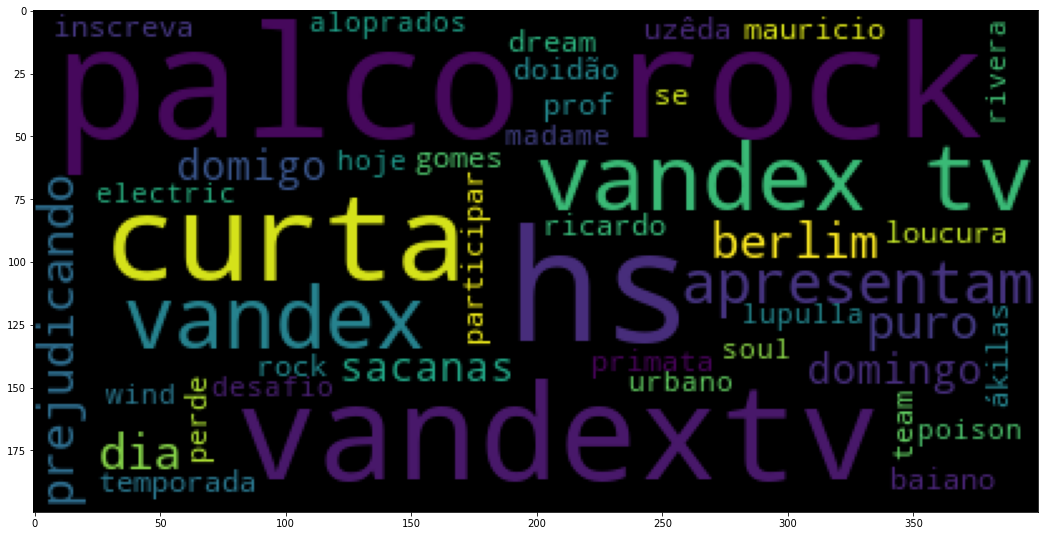

In [281]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize = (18,10))
plt.imshow(WordCloud().generate(textos_string));

### Pesquisa nos posts

In [282]:
string = 'lançamento formação prática deep learning e tensorflow python crie passo a passo projetos utilizando modernas técnicas machine learning curso preço promocional lançamento'

In [283]:
strings_busca = ['deep', 'python']
lista_tokens = [pln(item) for item in strings_busca]
lista_tokens

[deep, python]

In [284]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, *lista_tokens)

In [285]:
doc = pln(string)
matches = matcher(doc)
matches

[(8661325627334373315, 3, 4), (8661325627334373315, 7, 8)]

In [286]:
doc[3:4], doc[7:8]

(deep, python)

In [287]:
doc[3-2:4+2], doc[7-2:8+2]

(formação prática deep learning e, e tensorflow python crie passo)

In [288]:
strings_busca = ['deep learning', 'python']
lista_tokens = [pln(item) for item in strings_busca]
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, *lista_tokens)
numero_palavras = 10

In [289]:
search_strings_html = ' '.join([str(element) for element in strings_busca])
search_strings_html

'deep learning python'

In [290]:
from IPython.core.display import HTML

In [291]:
import warnings
warnings.simplefilter('ignore')

In [292]:
for index, row in dataframe_posts.iterrows():
  #print(index, row)
  marked_text = ''
  doc = pln(row['message_pre'])
  id = row['id']
  matches = matcher(doc)
  if matches == []:
    continue
  
  display(HTML(f'<h2>{search_strings_html.upper()}</h2>'))
  display(HTML(f""" 
                <p>
                  <strong>ID:</strong>{id}</br>
                  <strong>Palavras encontradas</strong> {len(matches)}
                </p>
              """))
  for i in matches:
    #print(i)  
    start = i[1] - numero_palavras
    if start < 0:
      start = 0
    for j in range(len(lista_tokens)):
      if doc[i[1]:i[2]].similarity(lista_tokens[j]) == 1.0:
        search_text = str(lista_tokens[j])
        marked_text += str(doc[start:i[2] + numero_palavras]).replace(search_text, f"<mark>{search_text}</mark>")
        marked_text += "<br /><br />"
  display(HTML(f"""<blockquote>... {marked_text} ..."""))


### Agrupamento por data

In [ ]:
dataframe_posts.head(1)

In [ ]:
dataframe_posts['created_time'] = pd.to_datetime(dataframe_posts['created_time'])

In [ ]:
posts_data = dataframe_posts.groupby(dataframe_posts['created_time'].dt.month).count()
posts_data

In [ ]:
grafico = px.bar(posts_data, x = posts_data.index, y = 'message', title = 'Posts por meses')
grafico.show()

### Extração dos comentários

In [293]:
lista_comentarios = []
for index, post in dataframe_posts.iterrows():
  #print(index, post)
  comentarios = graph.get_connections(id=post['id'], connection_name='comments', include_hidden = True)
  #print(comentarios)
  if comentarios['data']:
    #print(comentarios)
    lista_comentarios.append(comentarios['data'][0]['message'])

GraphAPIError: ignored

In [ ]:
len(lista_comentarios)

In [ ]:
comentarios_df = pd.DataFrame(lista_comentarios, columns = ['texto'])
comentarios_df

### Pré-processamento dos comentários

In [ ]:
comentarios_df['texto_pre'] = comentarios_df['texto'].apply(pre_processamento)
comentarios_df.head()

In [ ]:
def pre_processamento2(texto):
  documento = pln(texto)

  lista = []
  for token in documento:
    lista.append(token.lemma_)
  lista = ' '.join([str(elemento) for elemento in lista])
  return lista

In [ ]:
pre_processamento2('cuidar cuidado cuidando')

In [ ]:
comentarios_df['texto_pre2'] = comentarios_df['texto_pre'].apply(pre_processamento2)
comentarios_df.head()

### Análise de sentimentos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
classificador = spacy.load('/content/drive/MyDrive/Cursos - recursos/Mineração e Análise de Dados do Facebook/modelo')
classificador

In [ ]:
comentarios_df['texto_pre2'][1]

In [ ]:
previsao = classificador(comentarios_df['texto_pre2'][1])
previsao.cats

In [ ]:
comentarios_df['Sentimento'] = None
for i in range(0, len(comentarios_df)):
  sentimento = classificador(comentarios_df['texto_pre2'][i])
  if sentimento.cats['POSITIVO'] > sentimento.cats['NEGATIVO']:
    comentarios_df['Sentimento'][i] = 'Positivo'
  else:
    comentarios_df['Sentimento'][i] = 'Negativo'

In [ ]:
comentarios_df

In [ ]:
import seaborn as sns
sns.countplot(comentarios_df['Sentimento']);